# Logistic Regression

# 1. Data Exploration:

In [3]:
# import the pakages

In [7]:
import pandas as pd

In [11]:
# Step 1: Load the datasets
titanic_train = pd.read_csv('Titanic_train.csv')
titanic_test = pd.read_csv('Titanic_test.csv')

In [13]:
# Step 2: Calculate the mean of the 'survived' column in the training dataset
mean_survived = titanic_train['Survived'].mean()

In [15]:
# Step 3: Create the 'survived' column in the test dataset and fill it with the mean
titanic_test['survived'] = mean_survived

In [17]:
# Step 4: Merge the datasets
merged_data = pd.concat([titanic_train, titanic_test], ignore_index=True)

In [19]:
# Display the merged dataset
print(merged_data.head())

   PassengerId  Survived  Pclass  \
0            1       0.0       3   
1            2       1.0       1   
2            3       1.0       3   
3            4       1.0       1   
4            5       0.0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  survived  
0      0         A/5 21171   7.2500   NaN        S       NaN  
1      0          PC 17599  71.2833   C85        C       NaN  
2      0  STON/O2. 3101282   7.9250   NaN        S       NaN  
3      0            113803  53.1000  C123        S       NaN  
4    

In [21]:
merged_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,survived
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,NaN
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,NaN
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0.383838
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,0.383838
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0.383838
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0.383838


In [23]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  survived     418 non-null    float64
dtypes: float64(4), int64(4), object(5)
memory usage: 133.1+ KB



Summary Statistics
       PassengerId    Survived       Pclass          Age        SibSp  \
count  1309.000000  891.000000  1309.000000  1046.000000  1309.000000   
mean    655.000000    0.383838     2.294882    29.881138     0.498854   
std     378.020061    0.486592     0.837836    14.413493     1.041658   
min       1.000000    0.000000     1.000000     0.170000     0.000000   
25%     328.000000    0.000000     2.000000    21.000000     0.000000   
50%     655.000000    0.000000     3.000000    28.000000     0.000000   
75%     982.000000    1.000000     3.000000    39.000000     1.000000   
max    1309.000000    1.000000     3.000000    80.000000     8.000000   

             Parch         Fare      survived  
count  1309.000000  1308.000000  4.180000e+02  
mean      0.385027    33.295479  3.838384e-01  
std       0.865560    51.758668  3.334660e-16  
min       0.000000     0.000000  3.838384e-01  
25%       0.000000     7.895800  3.838384e-01  
50%       0.000000    14.454200  3

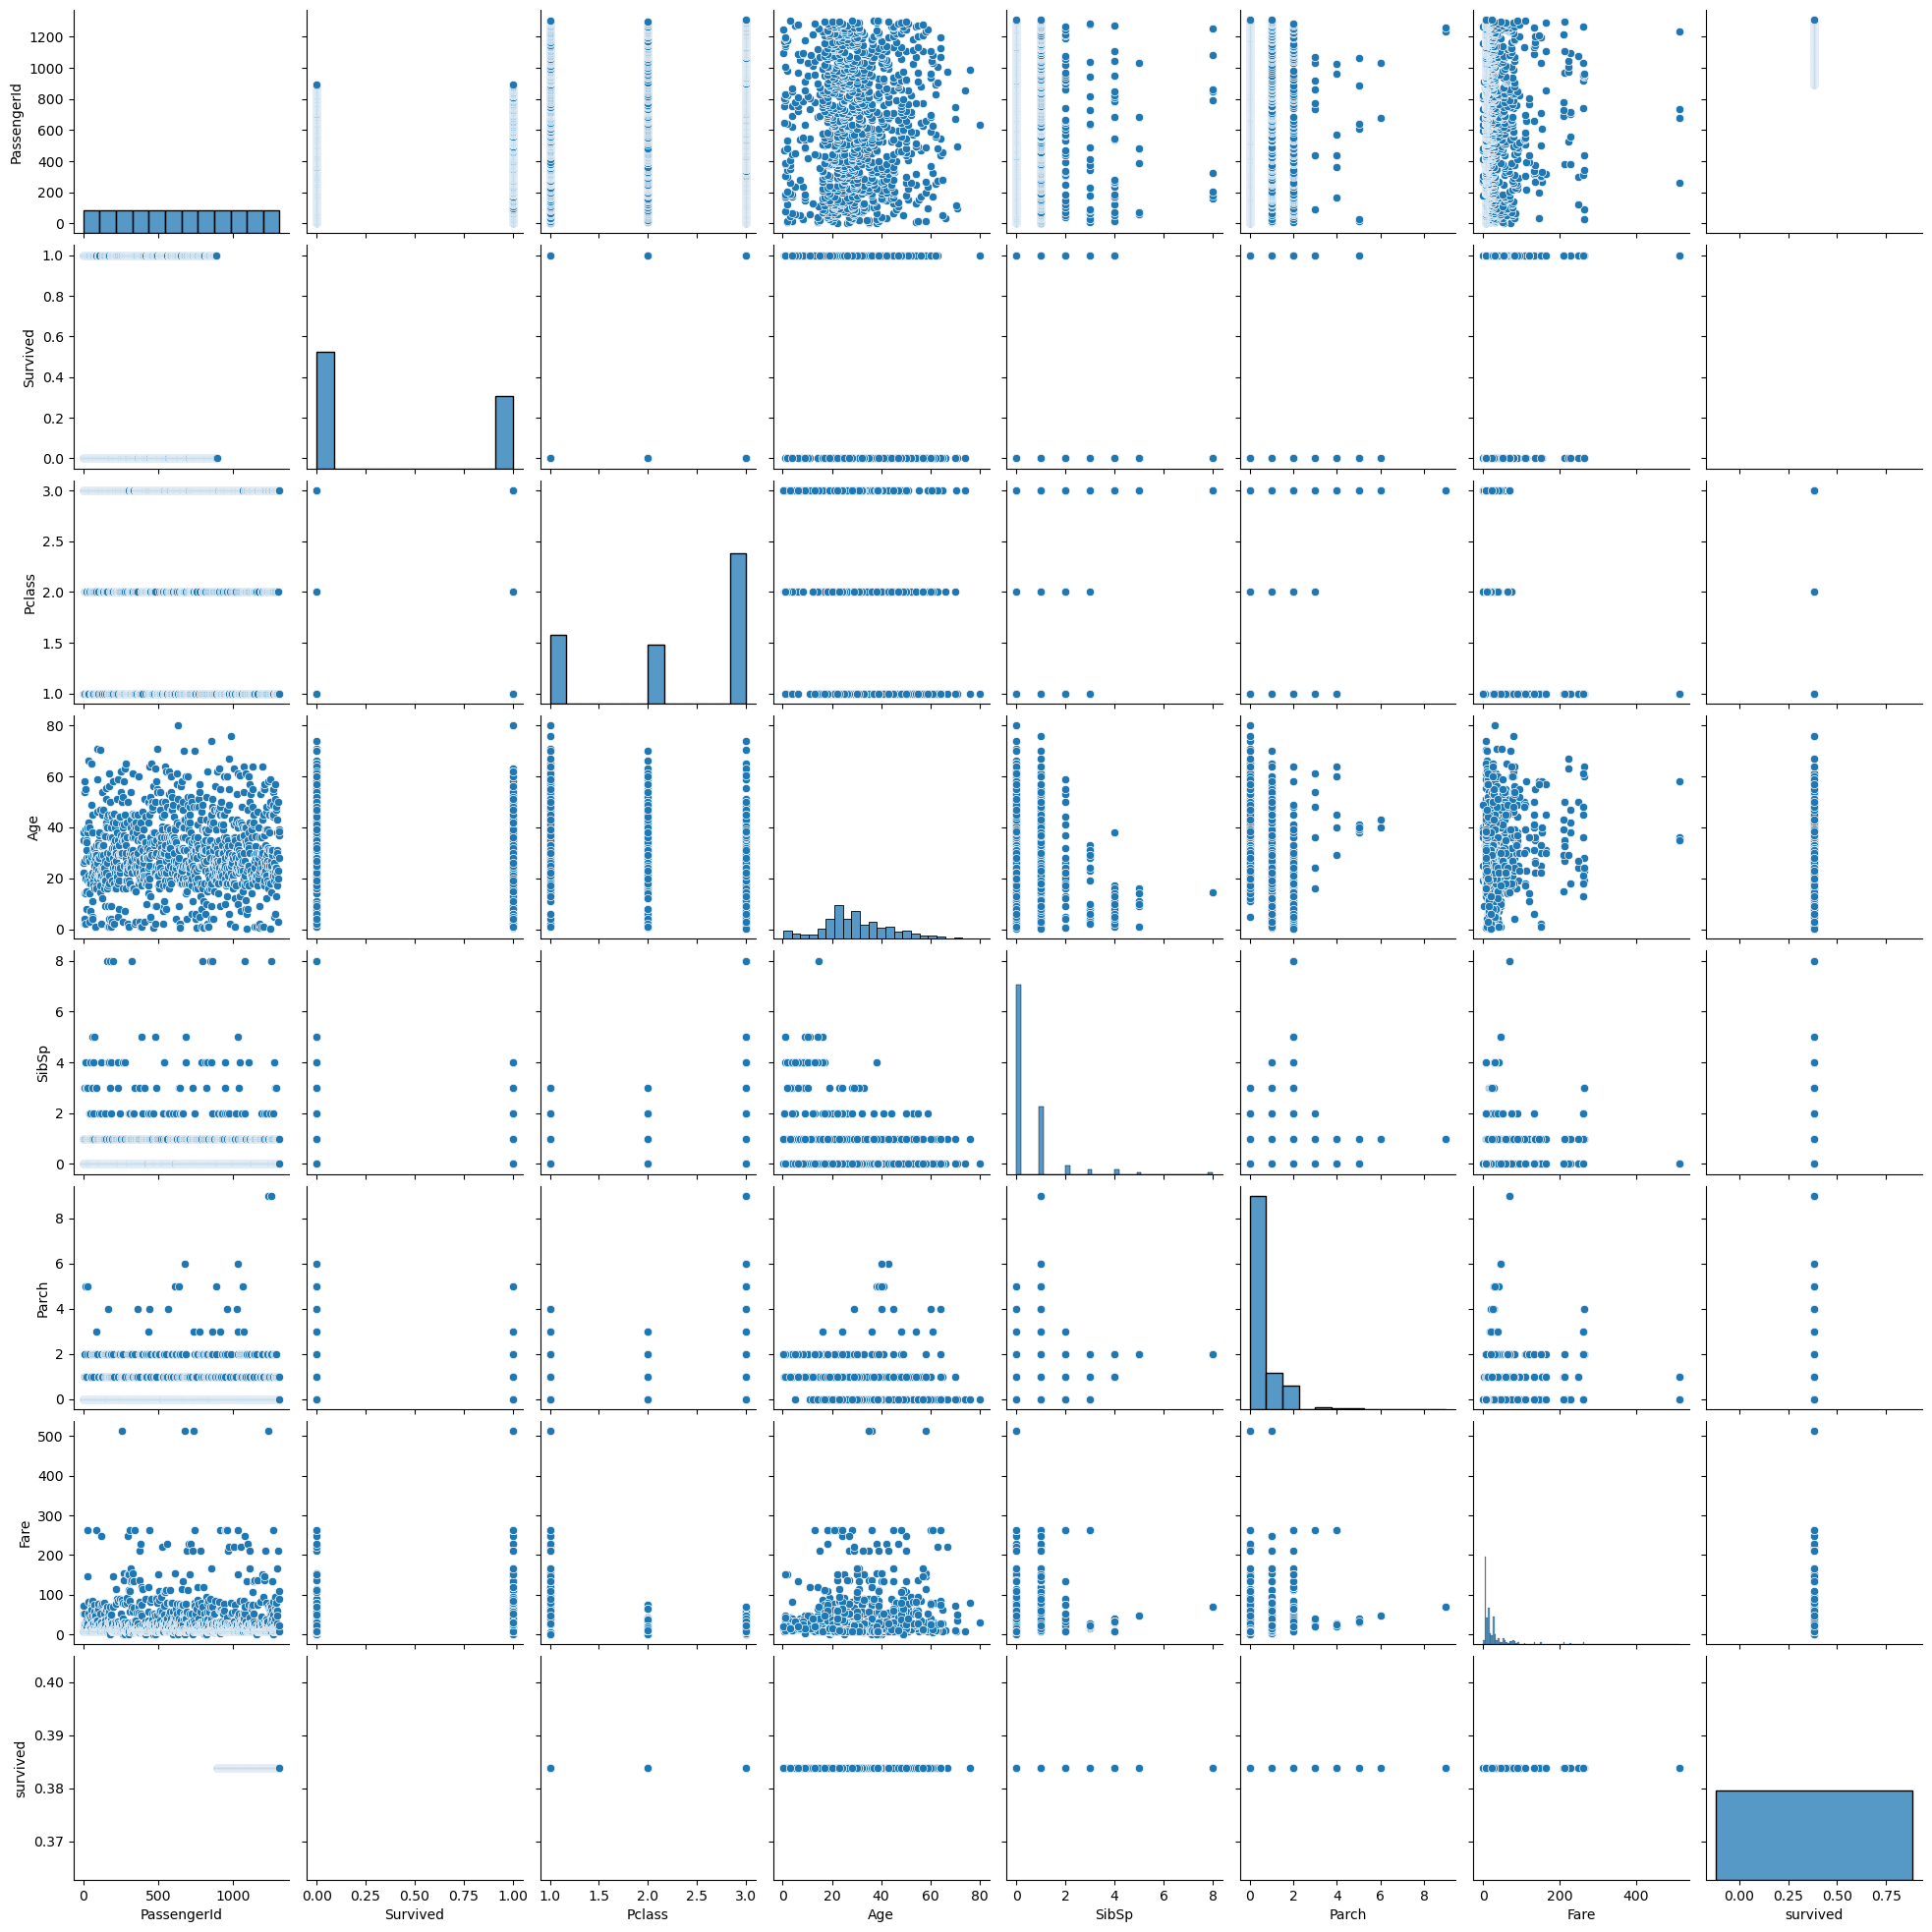

In [30]:
# new the features, their types, and summary statistic
print("\nSummary Statistics")
print(merged_data.describe())

# Create visualizations such as histograms, box plots, or pair plots
import matplotlib.pyplot as plt
import seaborn as sns
plt.color_sequences='red'
sns.pairplot(merged_data)
plt.show()

# 2. Data Preprocessing

In [32]:
#to check null values

In [36]:
merged_data.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
survived        891
dtype: int64

In [38]:
#Separating numerical and categorical columsn from dataset
num_cols = [col for col in merged_data.columns if merged_data[col].dtype != 'O']
cat_cols = [col for col in merged_data.columns if merged_data[col].dtype == 'O']

In [40]:
#import the simpleimputer
from sklearn.impute import SimpleImputer
# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder

In [42]:
# Create a SimpleImputer for numerical columns
num_imputer = SimpleImputer(strategy='mean')

# Create a SimpleImputer for categorical columns
cat_imputer = SimpleImputer(strategy='most_frequent')

# Apply the SimpleImputer to numerical columns
merged_data[num_cols] = num_imputer.fit_transform(merged_data[num_cols])

# Apply the SimpleImputer to categorical columns
merged_data[cat_cols] = cat_imputer.fit_transform(merged_data[cat_cols])

#Apply the LabelEncoder to categorical columns
le = LabelEncoder()
merged_data[cat_cols] = merged_data[cat_cols].apply(le.fit_transform)

In [44]:
merged_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
survived       0
dtype: int64

# 3. Model Building

In [47]:
# Convert the 'Survived' column to integer type to ensure it's treated as categorical
merged_data['Survived'] = merged_data['Survived'].astype(int)

In [49]:
#import the logistic regression

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [53]:
#Split the data into features (X) and target (y), and build a logistic regression model using scikit-learn
X = merged_data.drop('Survived', axis=1)
y = merged_data['Survived']

In [55]:
#to training the model.

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [65]:
import warnings
warnings.filterwarnings('ignore')

In [67]:
# to Build a logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

# 4. Model Evaluation

Accuracy: 0.7977099236641222
Precision: 0.6923076923076923
Recall: 0.4931506849315068
F1-score: 0.576
ROC-AUC score: 0.7042473001377111


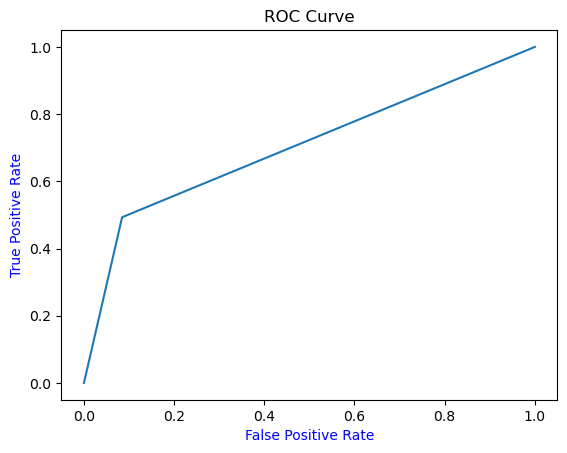

In [70]:
# Evaluate the performance of the model on the testing data
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import roc_curve

# Evaluate the model on the testing data
y_pred = log_reg.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))
print("ROC-AUC score:", roc_auc_score(y_test, y_pred))

# Visualize the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate",color="blue")
plt.ylabel("True Positive Rate",color="blue")
plt.title("ROC Curve")
plt.show()

# 5. Interpretation

a. Interpret the coefficients of the logistic regression model.

In [74]:
print("Coefficients:", log_reg.coef_)

Coefficients: [[-2.24122333e-03 -2.76268139e-01  2.81663986e-04 -1.69311030e+00
  -1.13761719e-03 -3.05144147e-01  2.67512684e-01 -4.27600503e-04
   5.77908634e-03  1.44024173e-02  3.45021881e-02  1.04551315e-01]]


b. Discuss the significance of features in predicting the target variable (survival probability in this case).

# **Interview Questions**

1. What is the difference between precision and recall?

2. What is cross-validation, and why is it important in binary classification?